In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

### Q2.1 Using the law of mass action

$$
  \frac{dS}{dt}\ = -k_1\,* S\,* E + k_2\,* ES
$$

$$
  \frac{dE}{dt}\ = -k_1\,* S\,* E + k_2\,* ES + k_3\,* ES
$$

$$
  \frac{dP}{dt}\ = k_3\,* ES
$$

$$
  \frac{dES}{dt}\ = k_1\,* S\,* E - k_2\,* ES - k_3\,* ES
$$

### Q2.2 

In [2]:
def enzyme_kinetics(t, x, params): # t = time, x = vector, params = vector
    """ returns the rate of change of vector x with time t, dxdt"""
    S = x[0] # first element of the vector x
    E = x[1] # second element of the vector x
    P = x[2] # third element of the vector x
    ES = x[3] # fourth element of the vector x
    
    k1 = params[0] # first element of the vector params
    k2 = params[1] # second element of the vector params
    k3 = params[2] # third element of the vector params
    
    dxdt = np.zeros((4,)) # initialize a zero vector with 4 columns and assign it to a variable, dxdt
    dxdt[0] = -k1*S*E + k2*ES # S
    dxdt[1] = -k1*S*E + k2*ES + k3*ES # E
    dxdt[2] = k3*ES # P
    dxdt[3] = k1*S*E - k2*ES - k3*ES # ES
    return dxdt

### The classic Runge-Kutta method (4th order)

$$
y_{i+1}\, = y_i + 1/6*(k_1 + 2*k_2 + 2*k_3 + k_4)*h,
$$

$$
x_{i+1}\, = x_i + h
$$

                                    for i = 0, 1, 2, 3, ...., using

$$
  k_1\, = f(x_i, y_i), 
$$

$$
  k_2\, = f(x_i + 1/2*h,  y_i + 1/2*k_1*h), 
$$

$$
  k_3\, = f(x_i + 1/2*h,  y_i + 1/2*k_2*h),
$$

$$
  k_4\, = f(x_i + h,  y_i + k_3*h),
$$


In [3]:
# Data Given
S0 = 10 # initial [S]
E0 = 1 # initial [E]
P0 = 0 # initial [P]
ES0 = 0 # initial [ES]

x0 = (S0, E0, P0, ES0) # pass in all initial concentrations of S, E, P, ES as x initial

k1 = 100 # rate constant 1
k2 = 600 # rate constant 2
k3 = 150 # rate constant 3

params = (k1, k2, k3) # pass in all rate constants, k1, k2, k3 as parameters

time_range = (0,1) # time range of 1 

function = lambda t, x: enzyme_kinetics(t, x, params) # create a user-defined function that returns t and x after passing 
                                                      # through the enzyme_model function

# solve the equation using Runge-Kutta methods (4th order to find solution and 5th order to estimate the error)
solution = scipy.integrate.solve_ivp(fun = function, t_span = time_range, y0 = x0, method='RK45', t_eval = np.arange(0,1,0.01))
solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1856
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])
 t_events: None
        y: array([[ 1.00000000e+01,  8.68684259e+00,  7.91935714e+00,
         7.18832609e+00,  6.49579583e+00,  5.84222831e+00,
    

Text(0.5, 1.0, 'Enzyme-catalyzed reaction')

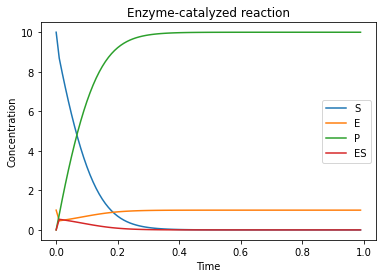

In [4]:
# plot graphs of rate of change in S, E, P, ES concentrations with respect to time
plt.plot(solution.t, solution.y.T) # plot all values of time, t against all different concentrations of S, E, P and ES
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend(["S", "E", "P", "ES"])
plt.title("Enzyme-catalyzed reaction")

# Note that [P] increases while [S] decreases over time

### Q2.3

$$
 Velocity,  V = \frac{dP}{dt}\
$$

Text(0, 0.5, 'dP/dt')

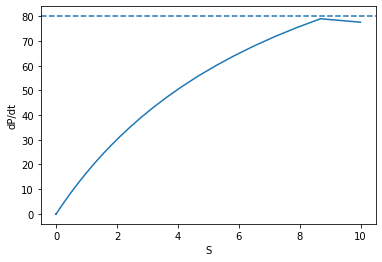

In [5]:
# plot graph of rate of change in P concentration with respect to S concentration
plt.figure()
P = solution.y[2,:].T # extract all values of P (3rd element of vector y)
S = solution.y[0,:-1].T # extract all values of S (1st element of vector y)
velocity_of_P = np.diff(P) / (solution.t[1] - solution.t[0]) # calculate rate of change in [P] with time 
plt.axhline(80, linestyle='--')
plt.plot(S, velocity_of_P)
plt.xlabel('S')
plt.ylabel('dP/dt')

In [6]:
# Vm = max(Velocity_of_P)
max(velocity_of_P)

78.99587857126237

### Answer: Vm = 78.99

### References

In [7]:
# https://cs.colby.edu/courses/F20/cs341/lecture_notes/lec04.pdf (Accessed 29 January 2022)

# https://en.wikipedia.org/wiki/Runge-Kutta_methods (Accessed 29 January 2022)

# https://en.wikipedia.org/wiki/Michaelis-Menten_kinetics (Accessed 29 January 2022)

### The End